# Prereqs

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Cleaning & Preprocessing

In [3]:
# Load the anime dataset
anime_df = pd.read_csv("data/anime.csv")
print("Anime dataset loaded successfully.")

# Print the first few rows of the anime dataset
print("First 5 rows of anime dataset:")
print(anime_df.head())

# Check for missing values and handle them
print("Checking for missing values in anime dataset...")
print(anime_df.isnull().sum())
anime_df = anime_df.dropna()
print("Missing values handled successfully in anime dataset.")

# Check for duplicate values and remove them if any
print("Checking for duplicate values in anime dataset...")
print("Number of duplicate rows:", anime_df.duplicated().sum())
anime_df = anime_df.drop_duplicates()
print("Duplicate values removed successfully from anime dataset.")

# Load the rating dataset
rating_df = pd.read_csv("data/rating.csv")
print("Rating dataset loaded successfully.")

# Print the first few rows of the rating dataset
print("First 5 rows of rating dataset:")
print(rating_df.head())

# Check for missing values and handle them
print("Checking for missing values in rating dataset...")
print(rating_df.isnull().sum())
rating_df = rating_df.dropna()
print("Missing values handled successfully in rating dataset.")

# Check for duplicate values and remove them if any
print("Checking for duplicate values in rating dataset...")
print("Number of duplicate rows:", rating_df.duplicated().sum())
rating_df = rating_df.drop_duplicates()
print("Duplicate values removed successfully from rating dataset.")


Anime dataset loaded successfully.
First 5 rows of anime dataset:
   anime_id                              name   
0     32281                    Kimi no Na wa.  \
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating   
0               Drama, Romance, School, Supernatural  Movie        1    9.37  \
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
Checking for missing values in anime dataset...
anime_id      0
name          0


# EDA

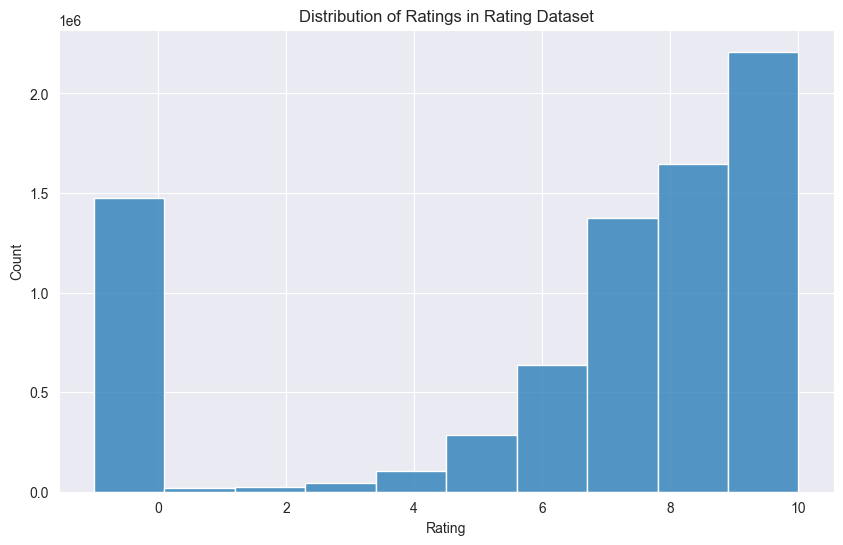

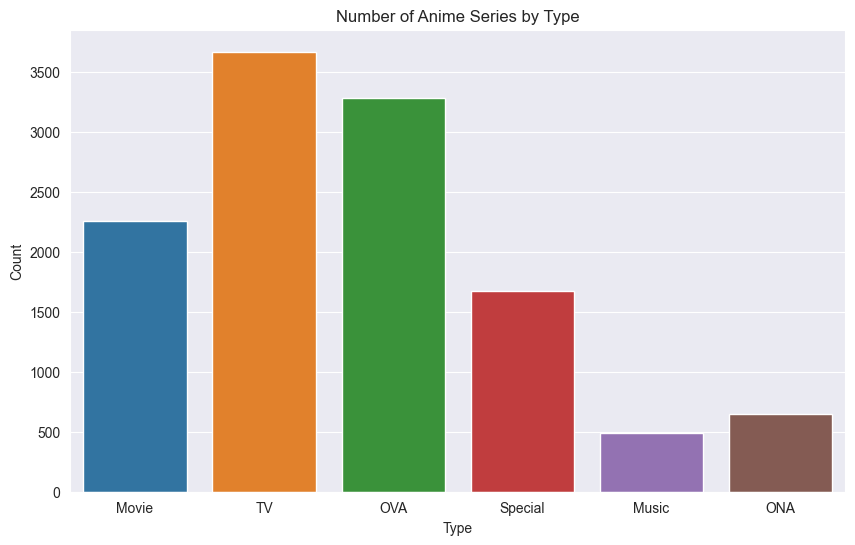

C:\Users\Aneesh\AppData\Local\Temp\ipykernel_13500\589155331.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=anime_df, x="type", y="rating", ci=None)


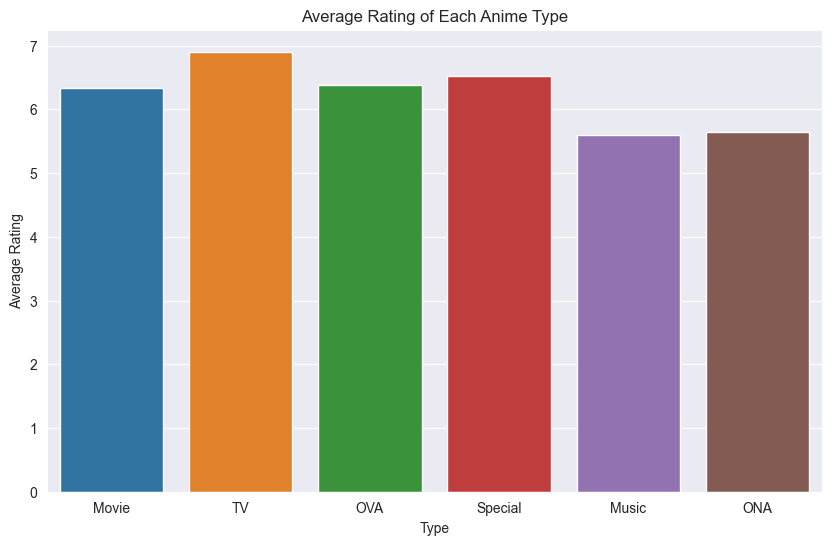

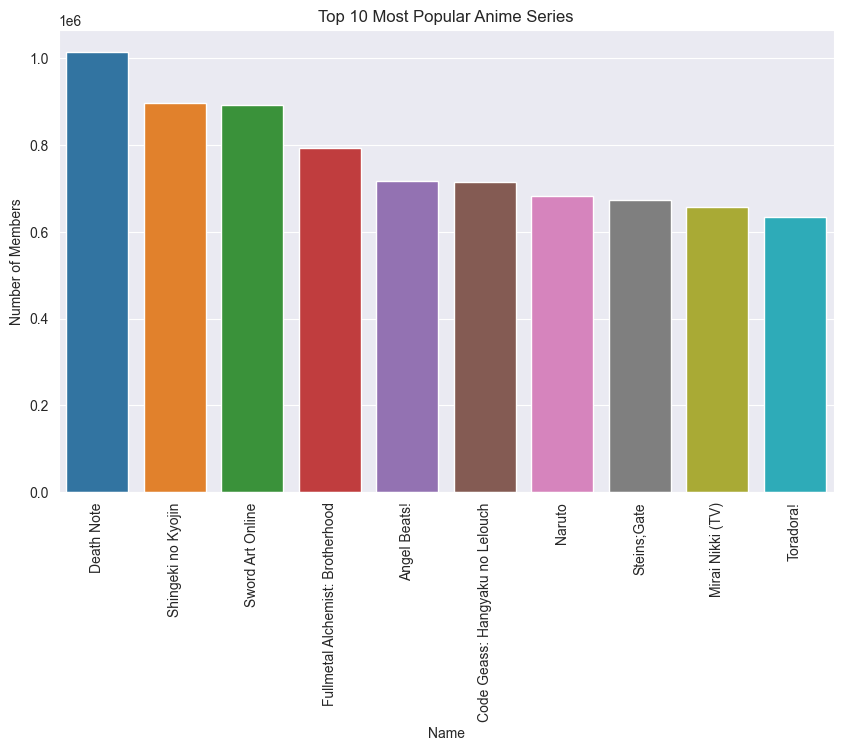

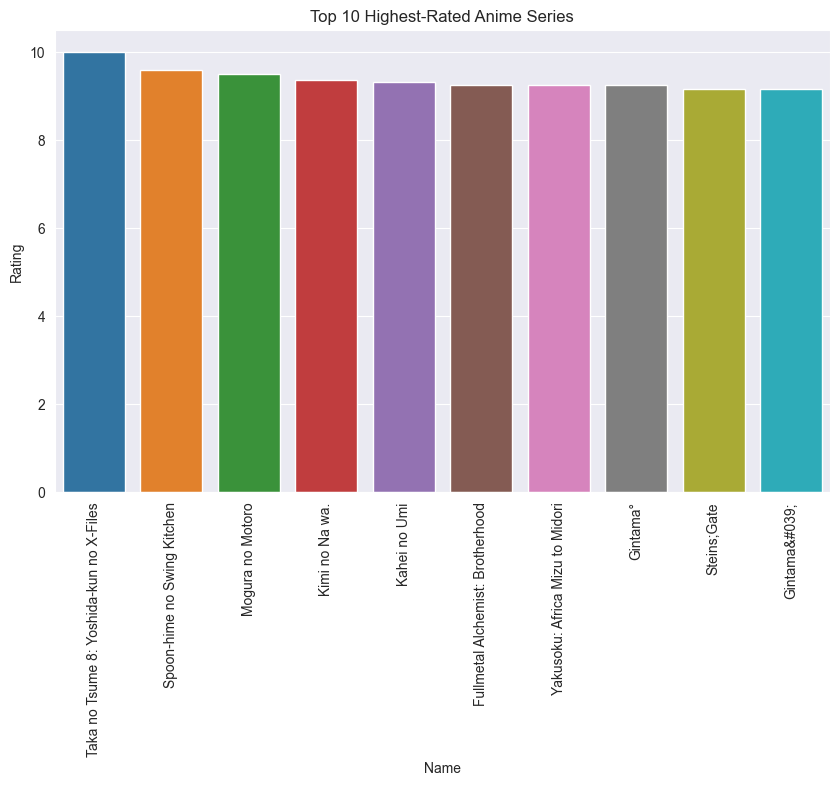

In [4]:
# Plot the distribution of ratings in the rating dataset
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=rating_df, x="rating", bins=10)
plt.title("Distribution of Ratings in Rating Dataset")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Plot the number of anime series by type in the anime dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=anime_df, x="type")
plt.title("Number of Anime Series by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# Plot the average rating of each anime type
plt.figure(figsize=(10, 6))
sns.barplot(data=anime_df, x="type", y="rating", ci=None)
plt.title("Average Rating of Each Anime Type")
plt.xlabel("Type")
plt.ylabel("Average Rating")
plt.show()

# Plot the top 10 most popular anime series
top_10_popular = anime_df.sort_values("members", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_popular, x="name", y="members")
plt.title("Top 10 Most Popular Anime Series")
plt.xlabel("Name")
plt.xticks(rotation=90)
plt.ylabel("Number of Members")
plt.show()

# Plot the top 10 highest-rated anime series
top_10_rating = anime_df.sort_values("rating", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_rating, x="name", y="rating")
plt.title("Top 10 Highest-Rated Anime Series")
plt.xlabel("Name")
plt.xticks(rotation=90)
plt.ylabel("Rating")
plt.show()


# Genre Analysis

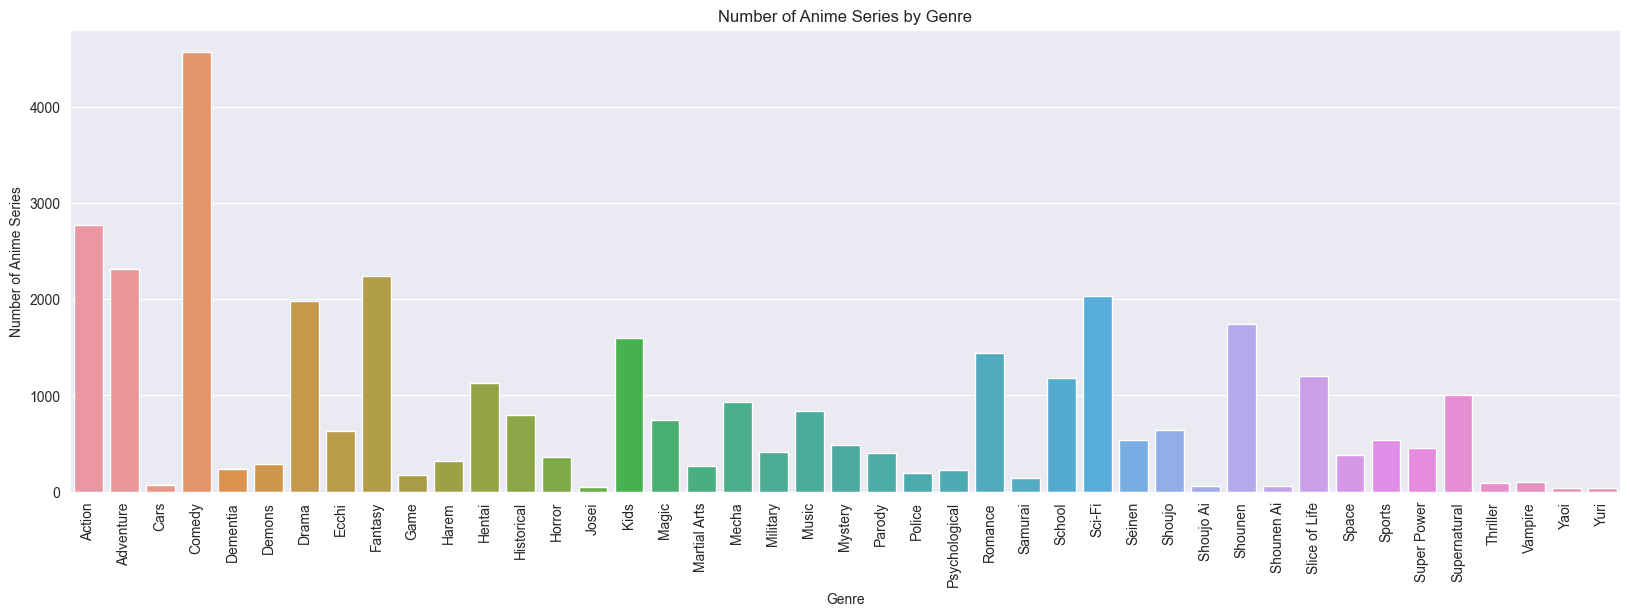

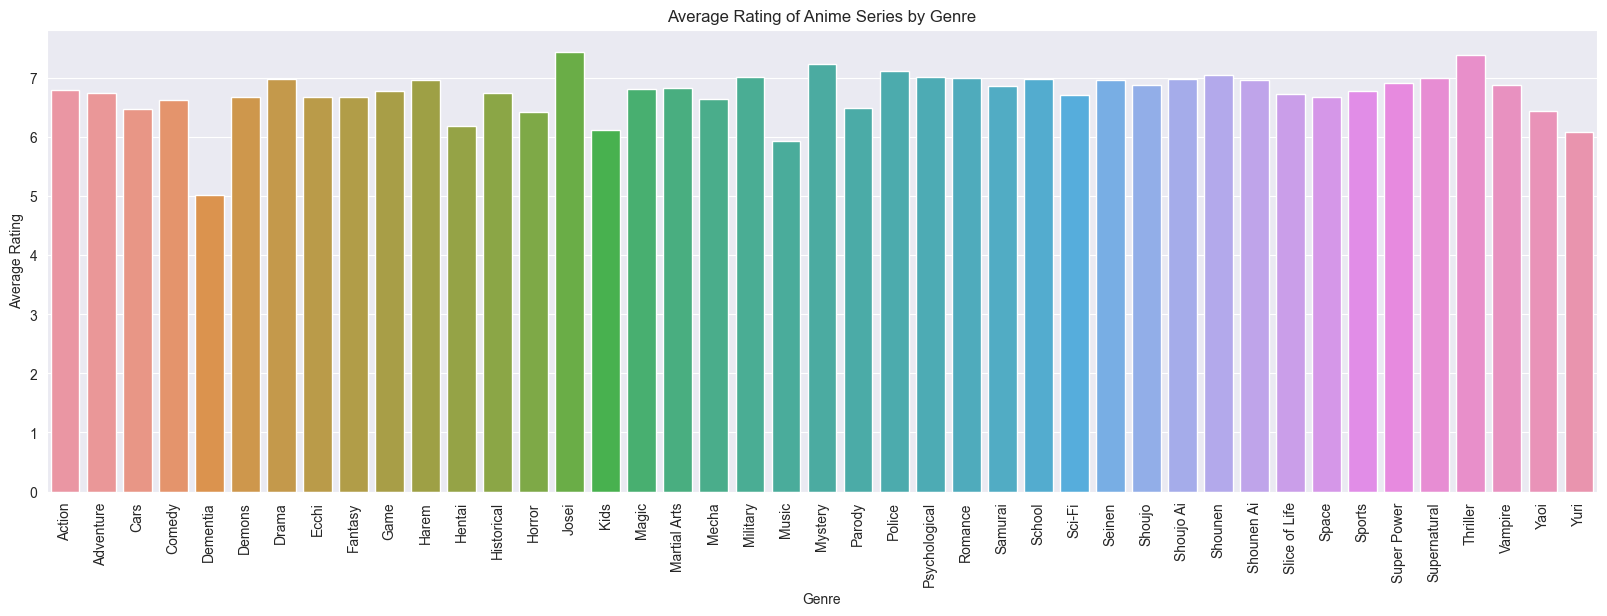

In [5]:
# Create a list of all unique genres
unique_genres = set()
for genres in anime_df["genre"].str.split(", "):
    unique_genres = unique_genres.union(set(genres))

# Remove null values from the unique_genres set
unique_genres.discard(None)

# Count the number of anime series in each genre
genre_counts = {}
for genre in unique_genres:
    count = anime_df[anime_df["genre"].str.contains(genre, na=False)].shape[0]
    genre_counts[genre] = count

# Plot the number of anime series in each genre
plt.figure(figsize=(20, 6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()), order=list(sorted(genre_counts.keys())))
plt.title("Number of Anime Series by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Anime Series")
plt.xticks(rotation=90)
plt.show()

# Plot the average rating of each genre
genre_ratings = {}
for genre in unique_genres:
    ratings = anime_df[anime_df["genre"].str.contains(genre, na=False)]["rating"]
    avg_rating = ratings.mean()
    genre_ratings[genre] = avg_rating

plt.figure(figsize=(20, 6))
sns.barplot(x=list(genre_ratings.keys()), y=list(genre_ratings.values()), order=list(sorted(genre_ratings.keys())))
plt.title("Average Rating of Anime Series by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()
